# Concepts

In this noteebook, we're going to cover:

- Architecture of a neural network regression model
- Input shapes and output shapes of a regression model (features and labels)
- Creating custom data to view and fit
- Step in modelling
    * Creating a model,
    * compiling a model,
    * fitting a model,
    * evaluating a model
- Different evaluation methods
- Saving and loading models

In [1]:
import tensorflow as tf

In [2]:
tf

<module 'tensorflow' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\__init__.py'>

## Introduction to Regression with Neural Networks in TensorFlow

There are many definations for a regression problem butin our case, we are going to simlify it: predicting a numerical variable based on some other combination of variables, even shorter.... predicting a number

In [3]:
# Import TensorFlow and check out version
print(tf.__version__)

2.7.0


In [4]:
for i in dir(tf.keras):
    if "_" not in i:
        print(i)

Input
Model
Sequential
activations
applications
backend
callbacks
constraints
datasets
estimator
experimental
initializers
layers
losses
metrics
models
optimizers
preprocessing
regularizers
utils
wrappers


## Creating data to view and fit

Text(0.5, 1.0, 'data visualization')

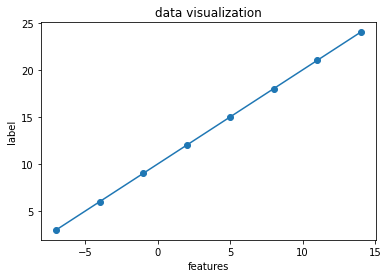

In [169]:
import numpy as np 
import matplotlib.pyplot as plt 

# Create features or data, or input
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Create label
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
plt.scatter(X,y)
plt.plot(X,y)
plt.xlabel("features")
plt.ylabel("label")
plt.title("data visualization")

In [170]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [171]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [210]:
# Turn our Numpy arrays into tensors
X = tf.cast(tf.constant(X),dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)

In [211]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([1]), TensorShape([]))

## Steps in modeling with TensorFlow

1. Creating a model - define the input and output layers,as well as the hidden layers of a deep learning model
2. Compiling the model - 
    - define the loss function (in other words, the function which tells our model how to wrong it is)
    - optimizer (tell our model how to improve the patterns its learning) 
    - evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting the model - letting the model try to find patterns between X& y (features and label)
4. Evaluating the model - test your model with testing data

In [174]:
for i in dir(tf.keras.layers):
    if "_" not in i:
        print(i)

AbstractRNNCell
Activation
ActivityRegularization
Add
AdditiveAttention
AlphaDropout
Attention
Average
AveragePooling1D
AveragePooling2D
AveragePooling3D
AvgPool1D
AvgPool2D
AvgPool3D
BatchNormalization
Bidirectional
CategoryEncoding
CenterCrop
Concatenate
Conv1D
Conv1DTranspose
Conv2D
Conv2DTranspose
Conv3D
Conv3DTranspose
ConvLSTM1D
ConvLSTM2D
ConvLSTM3D
Convolution1D
Convolution1DTranspose
Convolution2D
Convolution2DTranspose
Convolution3D
Convolution3DTranspose
Cropping1D
Cropping2D
Cropping3D
Dense
DenseFeatures
DepthwiseConv1D
DepthwiseConv2D
Discretization
Dot
Dropout
ELU
Embedding
Flatten
GRU
GRUCell
GaussianDropout
GaussianNoise
GlobalAveragePooling1D
GlobalAveragePooling2D
GlobalAveragePooling3D
GlobalAvgPool1D
GlobalAvgPool2D
GlobalAvgPool3D
GlobalMaxPool1D
GlobalMaxPool2D
GlobalMaxPool3D
GlobalMaxPooling1D
GlobalMaxPooling2D
GlobalMaxPooling3D
Hashing
Input
InputLayer
InputSpec
IntegerLookup
LSTM
LSTMCell
Lambda
Layer
LayerNormalization
LeakyReLU
LocallyConnected1D
LocallyC

**Note**: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`

In [175]:
X = tf.expand_dims(X,axis = -1)

In [177]:
X

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [176]:
X[0].shape

TensorShape([1])

In [ ]:
model.add()

In [180]:
# Set random seed
tf.random.set_seed(42)

input_shape = X[0].shape # the shape of 1 input sample
output_shape = y[0].shape # the shape of 1 output sample

print(f"input_shape {input_shape}, output_shape {output_shape}")

# 1. Create a model using Sequential  API
model = tf.keras.Sequential([
            tf.keras.layers.Dense(1,input_shape = X[0].shape)#input layer
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae, # mae is short for mean absolute mean error
    optimizer = tf.keras.optimizers.SGD(), # or just "sgd" sgd is short for stochastis gardient descent
    metrics = ['mae']
)

# 3. Fit the model
#model.fit(X,y,epochs = 5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

input_shape (1,), output_shape ()
Epoch 1/5
1/1 [==============================] - 0s 284ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [181]:
for i in dir(model):
    if "_" not in i:
        print(i)

add
apply
build
built
call
compile
dtype
dynamic
evaluate
fit
history
input
inputs
layers
loss
losses
metrics
name
optimizer
output
outputs
pop
predict
save
stateful
submodules
summary
trainable
updates
variables
weights


In [182]:
# the layers of model
model.layers

In [183]:
# summary your model
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [184]:
# input of the model
model.input, model.inputs

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_21_input')>,
 [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_21_input')>])

In [185]:
# output of the model
model.output,model.outputs

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_21')>,
 [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_21')>])

In [186]:
# the varibales of the model
model.variables

[<tf.Variable 'dense_21/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.74506]], dtype=float32)>,
 <tf.Variable 'dense_21/bias:0' shape=(1,) dtype=float32, numpy=array([0.05], dtype=float32)>]

In [187]:
# weight of the models
model.weights

[<tf.Variable 'dense_21/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.74506]], dtype=float32)>,
 <tf.Variable 'dense_21/bias:0' shape=(1,) dtype=float32, numpy=array([0.05], dtype=float32)>]

In [188]:
# predict new function
model.predict(tf.constant([17.0]),verbose = 1)

1/1 [==============================] - 0s 41ms/step


array([[12.716021]], dtype=float32)

In [189]:
X_test = tf.constant([20.,21.,22.,23.24,25.])
y_test = X_test + 10
#model.evaluate(X_test,y_test,verbose =1)
model.evaluate(tf.expand_dims(X_test,axis = -1),y_test,verbose =1)

1/1 [==============================] - 0s 96ms/step - loss: 15.6219 - mae: 15.6219


[15.621904373168945, 15.621904373168945]

In [190]:
model.loss

<function keras.losses.mean_absolute_error(y_true, y_pred)>

In [191]:
model.losses

[]

In [192]:
model.metrics

In [193]:
model.name

'sequential_21'

In [194]:
model.optimizer

In [195]:
model.pop # model.pop()

<bound method Sequential.pop of <keras.engine.sequential.Sequential object at 0x0000000036C19CD0>>

In [196]:
model.stateful

False

In [197]:
model.submodules

(<keras.engine.input_layer.InputLayer at 0x36c210d0>,
 <keras.layers.core.dense.Dense at 0x36c19e80>)

In [198]:
model.trainable

True

In [199]:
model.updates

<ipython-input-199-c13b30bff278>:1: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  model.updates


[]

In [200]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x0000000036C19CD0>>

 ## Improving out model
 
 We can improve our model, by alterign the steps we took to create a model
 
 1. **Creating a model** - here we might add more layers, increate the number of hidden units (all called neurons)
 within  each of the hidden layers, change the activation function of each layers.
 
 2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
 
 3. **Fitting a model** - here we might fit a model for more **epochs** (leave ti trainning for longer) or on more data (give the model more examples to learn from).
 

### bigger model

In [246]:
# Let create build your model

# 1.Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(
loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
    metrics = ['mae']
)

model.fit(X,y,epochs = 100, verbose = 1) 

Epoch 1/100
1/1 [==============================] - 0s 460ms/step - loss: 11.7755 - mae: 11.7755
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2694 - mae: 8.2694
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 19.5601 - mae: 19.5601
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 13.1179 - mae: 13.1179
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8872 - mae: 12.8872
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 12.5833 - mae: 12.5833
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1216 - mae: 12.1216
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3016 - mae: 11.3016
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 9.5623 - mae: 9.5623
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 6.8859 - mae: 6.8859
Epoch 11/100
1/1 [==============================] - 0s 13m

1/1 [==============================] - 0s 12ms/step - loss: 6.8681 - mae: 6.8681
Epoch 88/100
1/1 [==============================] - 0s 15ms/step - loss: 5.9672 - mae: 5.9672
Epoch 89/100
1/1 [==============================] - 0s 12ms/step - loss: 4.0760 - mae: 4.0760
Epoch 90/100
1/1 [==============================] - 0s 14ms/step - loss: 4.3594 - mae: 4.3594
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3324 - mae: 7.3324
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 6.6536 - mae: 6.6536
Epoch 93/100
1/1 [==============================] - 0s 13ms/step - loss: 5.7749 - mae: 5.7749
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 3.5203 - mae: 3.5203
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0803 - mae: 7.0803
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2687 - mae: 7.2687
Epoch 97/100
1/1 [==============================] - 0s 8ms/step - loss: 6.6592

In [247]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 1)                 2         
                                                                 
 dense_54 (Dense)            (None, 4)                 8         
                                                                 
 dense_55 (Dense)            (None, 1)                 5         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### learning_rate

In [241]:
# Let create build your model

# 1.Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2.Compile the model
model.compile(
loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
    metrics = ['mae']
)
# 3.Fit the model
model.fit(X,y,epochs = 100, verbose = 1)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 12.4664 - mae: 12.4664
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1414 - mae: 11.1414
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8164 - mae: 9.8164
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 8.4914 - mae: 8.4914
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2000 - mae: 7.2000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1438 - mae: 7.1438
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0875 - mae: 7.0875
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0312 - mae: 7.0312
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 6.9750 - mae: 6.9750
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 6.9188 - mae: 6.9188
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss

1/1 [==============================] - 0s 10ms/step - loss: 3.3652 - mae: 3.3652
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 3.3914 - mae: 3.3914
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 2.8121 - mae: 2.8121
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 2.9789 - mae: 2.9789
Epoch 91/100
1/1 [==============================] - 0s 12ms/step - loss: 3.0590 - mae: 3.0590
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 3.2914 - mae: 3.2914
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 2.5371 - mae: 2.5371
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 2.8789 - mae: 2.8789
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 2.7527 - mae: 2.7527
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 3.1914 - mae: 3.1914
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 2.2621 - 

In [242]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 106ms/step - loss: 2.8326 - mae: 2.8326


[2.8325867652893066, 2.8325867652893066]

In [243]:
model.predict([17.0])

array([[28.545216]], dtype=float32)

In [248]:
# 1.create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2.compile the model
model.compile(loss = "mae",
             optimizer =tf.keras.optimizers.SGD(),
             metrics = ['mae'])

# 3.fit the model
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 480ms/step - loss: 13.4154 - mae: 13.4154
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9840 - mae: 12.9840
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 12.5531 - mae: 12.5531
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.1163 - mae: 12.1163
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6708 - mae: 11.6708
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2189 - mae: 11.2189
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7562 - mae: 10.7562
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 10.2776 - mae: 10.2776
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 9.7822 - mae: 9.7822
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.2689 - mae: 9.2689
Epoch 11/100
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 12ms/step - loss: 3.7378 - mae: 3.7378
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 3.6936 - mae: 3.6936
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7448 - mae: 3.7448
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6832 - mae: 3.6832
Epoch 92/100
1/1 [==============================] - 0s 14ms/step - loss: 3.7450 - mae: 3.7450
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7001 - mae: 3.7001
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7168 - mae: 3.7168
Epoch 95/100
1/1 [==============================] - 0s 7ms/step - loss: 3.7068 - mae: 3.7068
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 3.6885 - mae: 3.6885
Epoch 97/100
1/1 [==============================] - 0s 11ms/step - loss: 3.7138 - mae: 3.7138
Epoch 98/100
1/1 [==============================] - 0s 7ms/step - loss: 3.6602 -

In [250]:
model.predict([17.0]) # this mean your model get overfitting

array([[31.290989]], dtype=float32)

In [259]:
# 1.create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2.compile the model
model.compile(loss = "mae",
             optimizer =tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ['mae'])

# 3.fit the model
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 370ms/step - loss: 12.7394 - mae: 12.7394
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1187 - mae: 12.1187
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4871 - mae: 11.4871
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8530 - mae: 10.8530
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2149 - mae: 10.2149
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.5717 - mae: 9.5717
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9225 - mae: 8.9225
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3697 - mae: 8.3697
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.8173 - mae: 7.8173
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 7.2520 - mae: 7.2520
Epoch 11/100
1/1 [==============================] - 0s 14ms/ste

1/1 [==============================] - 0s 11ms/step - loss: 0.2848 - mae: 0.2848
Epoch 89/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2717 - mae: 0.2717
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2668 - mae: 0.2668
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2117 - mae: 0.2117
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2340 - mae: 0.2340
Epoch 93/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1688 - mae: 0.1688
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1406 - mae: 0.1406
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2873 - mae: 0.2873
Epoch 96/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2195 - mae: 0.2195
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2447 - mae: 0.2447
Epoch 98/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2548 - m

In [260]:
model.predict([17.0])

array([[26.805319]], dtype=float32)

In [261]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 50)                100       
                                                                 
 dense_69 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [262]:
model.weights

[<tf.Variable 'dense_68/kernel:0' shape=(1, 50) dtype=float32, numpy=
 array([[ 0.40940237,  0.1158734 , -0.11742507,  0.0202668 ,  0.06121049,
          0.04923779,  0.24481967,  0.02810549,  0.07467724,  0.24582566,
         -0.0229346 ,  0.08465689,  0.02267373, -0.3329197 , -0.26158887,
          0.0750986 , -0.18727313,  0.33743015,  0.10217839, -0.222123  ,
          0.02389804,  0.31678537, -0.03114722,  0.10372727,  0.3747606 ,
          0.23437032,  0.2451021 , -0.26397002,  0.3226201 , -0.09567455,
          0.00164179, -0.05614321, -0.00311675,  0.01412919, -0.05038559,
          0.01315848, -0.04970476,  0.04567488, -0.24667121, -0.30753434,
          0.02129273, -0.0181615 ,  0.10866207, -0.03904265, -0.02610854,
         -0.24127191, -0.04223955,  0.21578991, -0.01698329, -0.01792624]],
       dtype=float32)>,
 <tf.Variable 'dense_68/bias:0' shape=(50,) dtype=float32, numpy=
 array([ 0.4944562 ,  0.6383329 , -0.2520675 ,  0.8303946 ,  0.6738124 ,
         0.7042203 ,  0.5

## Evaluating model

In pratice, a typical workflow you will go throught when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it  -> evalue it...
```

When i come to evaluation... there is 3 words you shoiuld memorize:

```Visualize, visualize, visualize```

It is a good idea to visualize:

* The data - what data are we working with? What does it look like?

* The model ifself - what does model look like?

* The training of a model - how does a model perform while it learn?

* The predictions of model - how do the predictions of a model line up against the ground truth ( the original labels )

In [264]:
# Make a gibber dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [267]:
# Make label for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

TypeError: title() missing 1 required positional argument: 'label'

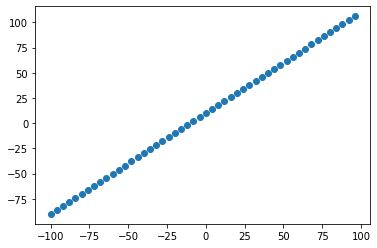

In [270]:
# Visualize the data
plt.scatter(X,y)
plt.xlabel("")
plt.ylabel("")
plt.title("")

## The 3 datasets...

* **Training set** - the model learns from this data,which is typycally **70-80%** of the total data you have available.

* **Validation set** - the model gets tuned on this data, this is typically **10-15%** of data available.

* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typycally **10-15%** of the total data available.

In [271]:
# Check the lenght of how many samples we have
len(X)

50

In [273]:
# Split the  data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train),len(X_test)

(40, 10)

## Visualing the data
Now we've got our data training and test sets... let's visualize it again


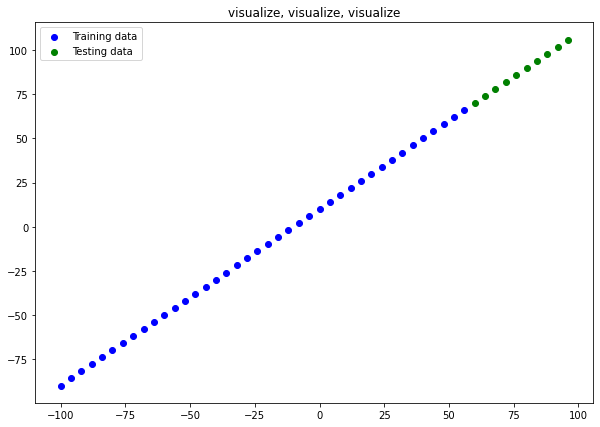

In [275]:
plt.figure(figsize = (10,7))
# plot training data in blue
plt.scatter(X_train,y_train,c = 'b', label = 'Training data') # our model will learn from this data
# plor test data in green
plt.scatter(X_test,y_test,c = 'g',label = 'Testing data') # want your model to predict this (given X, what is y)
# give your plot a name
plt.title("visualize, visualize, visualize")
# Show a legend
plt.legend()

In [ ]:
# Let have a look at how to build  a neural network for our data

#1./ Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2./ Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics= ['mae'])

#3./ Fit the model
#model.fit(X_train,y_train,epochs= 100)

## Visualing the model

In [276]:
# Let build your model first
model.build()

In [277]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 50)                100       
                                                                 
 dense_69 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [286]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])


In [287]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters -these are parameters (patterns) the model can update as it trains.
* Non-trainabke params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [288]:
# Let fit the model into training data
model.fit(X_train,y_train,epochs = 100,verbose =0)